# **Project: Amazon Product Recommendation System**

# **Marks: 40** | **By FANI TZINA**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing surprise library**

In [ ]:
# Installing surprise library
!pip install surprise

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Basic python libraries
import numpy as np
import pandas as pd

# Python libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD
from collections import defaultdict

# For implementing cross validation
from surprise.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [ ]:
# Read my dataset...
data = pd.read_csv("/content/drive/MyDrive/MIT-project 3/ratings_Electronics.csv")

#... and let's take a look at it.
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


**FANI TZINA's NOTES**:

>We can tell that our dataset indeed has 7.824.481 entries (rows) and 4 columns: these columns do not have the usual titles-names we have seen in previous projects, so we assume that:
  * column 0 indicates to the "userId",
  * column 1 indicates to the "productId",
  * column 2 indicates to the "productId",
  * column 3 indicates to the "Rating", and
  * column 3 indicates to the "timestamp".

  This is not very convenient though, that's why in the next line we are going to replace these "assumptions" to normal titles of our dataset, in order to make it easier for us to read and observe our data.



In [ ]:
# Add column titles:
data.rename(columns = {'AKM1MP6P0OYPR':'user_id', '0132793040':'prod_id', "5.0":"rating", "1365811200":"timestamp"}, inplace = True)
data.head()

,user_id,prod_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [ ]:
# Next: we are going to remove the column "timestamp":
data.drop("timestamp", axis=1, inplace=True)
data.head()

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [ ]:
# Let's create a copy of our dataset:
df = data.copy()
df

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824477,A322MDK0M89RHN,BT008UKTMW,5.0
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0


**FANI TZINA's COMMENTS:**
Well, of course, the copy of our dataset will have the exact same number of columns (7.824.481 entries) BUT since we erased the 4th column of the original dataset, this copy will have 3 columns as well. So, our copied dataframe has a shape of 7824481 x 3.

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [ ]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [ ]:
# Check the number of rows and columns and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**FANI TZINA's observations:**
> So we eventually reduced our dataset's size, which now has 65.290 rows and 3 columns (as explained before).

### **Data types**

In [ ]:
# Check Data types
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**FANI TZINA's observations:**
>* The "rating" column is numeric data type (float64).
* The "user_id" and "prod_id" columns are both of "object" data type. We'll convert them to string formats, as seen on the code below. Why? Because there may be entries that contain both numbers and letters and so, it is better to turn these entries to strings and avoid errors in our code in the near future.

### **Checking for missing values**

In [ ]:
# Check for missing values present
df_final.info()

# or we could try the following command:
# df_final.isnull()
# which returns "False" in all rows of the 3 columns of our dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**FANI TZINA's observations:**
> * There are no missing values: we can see that all 3 columns have 65.290 entries.

### **Summary Statistics**




In [ ]:
# Practically here, we have to calculate the basic statistics of a variable that
# help us understand better the distribution and characteristics of the data
# in the desired column. So:
rating_summary = df["rating"].describe()
rating_summary

count    125871.000000
mean          4.261339
std           1.062144
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

**FANI TZINA's observations:**
> From the code above, we can notice that:
* The column "rating" has 125.871 entries and they are all numeric data type.
* It has Mean value equal to 4.26 and STD value equal to almost 1.
* the minimun value of "rating" is equal to 1, while the majority of users' rating is equal to 5, which is the maximum "points" of rating a user can give to a product.

### **Checking the rating distribution**

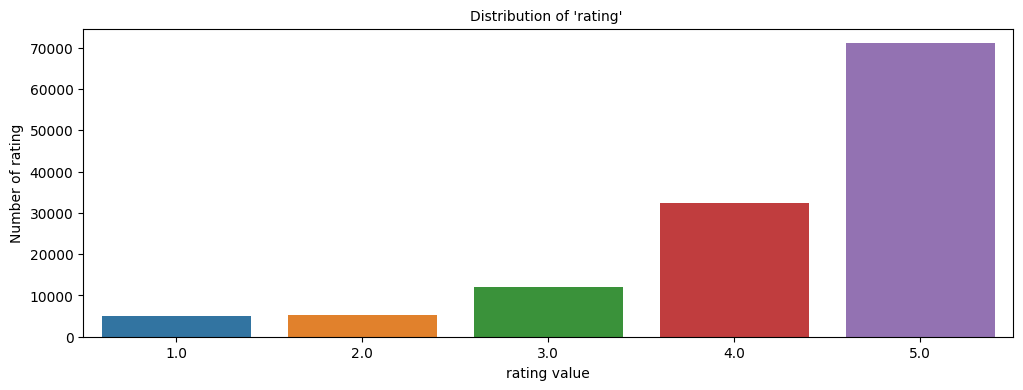

In [ ]:
# Find and plot the Distribution of "rating" column
plt.figure(figsize = (12, 4))
sns.countplot(x="rating", data=df)

plt.tick_params(labelsize = 10)
plt.title("Distribution of 'rating' ", fontsize = 10)
plt.xlabel("rating value", fontsize = 10)
plt.ylabel("Number of rating", fontsize = 10)
plt.show()

**FANI TZINA's observations:**
> * As per the histogram above, the column "rating" 5.0 has the highest count of ratings (equal to 70.000), followed by "rating" 4.0, which has almost 35.000 observations: around half of the counts that "rating" 5.0 has.
* The are very few counts for "rating" 1.0, 2.0, and 3.0.

### **Checking the number of unique users and items in the dataset**

In [ ]:
# Number of total rows in the data and number of unique user_id and prod_id in the data

# First I will calculate the number of unique users:
df['user_id'].nunique()

1540

In [ ]:
# And now, I will calculate the number of unique products:
df['prod_id'].nunique()

48190

**FANI TZINA's observations:**
> * There are 1540 users and 48190 products in our dataset.
* As per the number of unique users and products, there is a possibility of 1540 * 48190 = 74.212.600 ratings in the dataset. But, as seen above, there are only have 125.871 ratings, which means that not every user has rated every product of the dataset. So, we could build a Recommendation System to recommend products to users to which they have not interacted with yet.

### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings

# Group by 'user_id' and count the number of ratings
user_ratings_count = df.groupby('user_id')['rating'].count()
fixed_user_ratings_count = user_ratings_count.reset_index()
fixed_user_ratings_count

,user_id,rating
0,A100UD67AHFODS,116
1,A100WO06OQR8BQ,132
2,A105S56ODHGJEK,68
3,A105TOJ6LTVMBG,71
4,A10AFVU66A79Y1,65
...,...,...
1535,AZBXKUH4AIW3X,53
1536,AZCE11PSTCH1L,60
1537,AZMY6E8B52L2T,189
1538,AZNUHQSHZHSUE,54


In [ ]:
# Sort by the number of ratings in descending order and get the top 10 users
top_10_users = fixed_user_ratings_count.sort_values(by='rating', ascending=False)
top_10_users.head(10)

,user_id,rating
1203,A5JLAU2ARJ0BO,520
1287,ADLVFFE4VBT8,501
1086,A3OXHLG6DIBRW8,498
1210,A6FIAB28IS79,431
1209,A680RUE1FDO8B,406
264,A1ODOGXEYECQQ8,380
903,A36K2N527TXXJN,314
521,A2AY4YUOX2N1BQ,311
1508,AWPODHOB4GFWL,308
1439,ARBKYIVNYWK3C,296


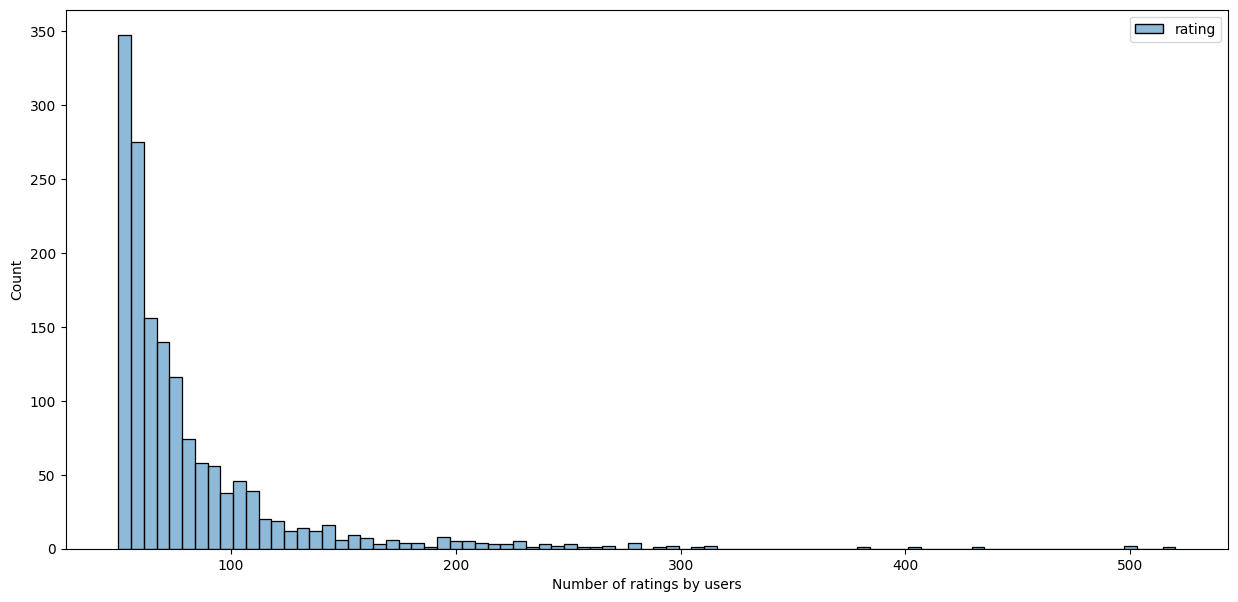

In [ ]:
# Let's plot the above results for better visualization:
plt.figure(figsize=(15,7))
sns.histplot(fixed_user_ratings_count)
plt.xlabel('Number of ratings by users')
plt.show()

**FANI TZINA's observations:**
> In order to solve this question, I have to ***combine (or else, group) the "user" column with the "rating" columns** to get the number of ratings each user has given. Once our 2 columns are combined, it is important to fix the indexes of the new "dataframe" I just created. This is essential for the following step which is to sort the resulting dataframe by the number of 'rating' in ***descending*** order -since we are looking for the ***top*** users-. Finally, using the command .head(10), one can print the top 10 users with the most ratings.

* From the plot shown above, we can conclude to the following:
1. The distribution is highly skewed to the right.
2. It clearly shows that there are very few products which have many ratings.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
# In order to solve this chapter, I prefer to create a copy of the "final ratings" we calculated above
# so that we do not mix and/or destroy our results. So, I am going to create the variable "d", which is the copy of the "final_rating".
d = df_final.copy()

In [ ]:
# Calculate the average rating for each product
average_rating = d.groupby('prod_id').mean()['rating']
print("The average rating for each product is " , average_rating)

# Calculate the count of ratings for each product
count_rating = d.groupby('prod_id').count()['rating']
print("\nThe count of ratings for each product is " , count_rating)

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

# Let's take a look at the first five records of our new dataset:
final_rating.head()

The average rating for each product is  prod_id
1400501466    3.333333
1400532655    3.833333
1400599997    4.000000
9983891212    4.875000
B00000DM9W    5.000000
                ...   
B00L21HC7A    4.625000
B00L2442H0    4.916667
B00L26YDA4    4.384615
B00L3YHF6O    5.000000
B00LGQ6HL8    5.000000
Name: rating, Length: 5689, dtype: float64

The count of ratings for each product is  prod_id
1400501466     6
1400532655     6
1400599997     5
9983891212     8
B00000DM9W     5
              ..
B00L21HC7A    16
B00L2442H0    12
B00L26YDA4    13
B00L3YHF6O    14
B00LGQ6HL8     5
Name: rating, Length: 5689, dtype: int64


,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [ ]:
# Here, we are going to define a function that will return the top N products
# based on the highest "average rating" and "minimum interactions".

def top_n_products(data, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = data[data['rating_count'] > min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by='avg_rating', ascending=False)

    return recommendations.index[:n]

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
# We are looking specifficaly the top N=5 products -from the new dataset we that
# created above- with min_interaction=50 minimum interactions based on their
# popularity. So let's gather them on a list, which I call "ans":
ans = list(top_n_products(final_rating, 5, 50))

# Name of the products
list_of_products = []
for i in ans:
    list_of_products.append(df[df['prod_id'] == str(i)]['user_id'].unique()[0])
list_of_products

['ADLVFFE4VBT8',
 'AAXAKFQEAQPWC',
 'A2TN0U8173HM7A',
 'A1O229NVVDJUX2',
 'A1V4A5U5O3TMMD']

### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
ans2 = list(top_n_products(final_rating, 5, 100))

# Name of the products
list_of_products2 = []
for i in ans2:
    list_of_products2.append(df[df['prod_id'] == str(i)]['user_id'].unique()[0])
list_of_products2

['AAXAKFQEAQPWC',
 'A9ELHLPXF7JKD',
 'A3CW0ZLUO5X2B1',
 'ABSYIF0ONC2AF',
 'A24HWYHR28JJ7A']

We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 10))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
algo_knn_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
# Train the algorithm on the train set, and predict ratings for the test set
algo_knn_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(algo_knn_user)

RMSE: 1.0250
Precision:  0.86
Recall:  0.783
F_1 score:  0.82


**FANI TZINA's observations:**
> * The baseline model has **RMSE = 1.025** on the test set.
* **Intuition of Precision:** We are getting a precision of **0.86**, which means **out of all the recommended books, 86% are relevant**.
* **Intuition of Recall:** We are getting a recall of **~0.78**, which means **out of all the relevant books, 78% are recommended**.
* Also, we can notice that **F_1 score** of the baseline model is **0.82**. It indicates that **mostly recommended books were relevant and relevant books were recommended**. We can try to improve the performance by using GridSearchCV to tune different hyperparameters of the algorithm.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [ ]:
# Predicting rating for a sample user with userId=A3LDPF5FMB782Z, who have
# interacted product productId=1400501466.
algo_knn_user.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.00   {'actual_k': 4, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.0, details={'actual_k': 4, 'was_impossible': False})

**FANI TZINA's observations:**
> In this case, the user provided a rating of 5.00 for this item and the recommendation algorithm has estimated a rating of approximately 3.00, which is not very good: the recommendation algorithm indicates that it couldn't make a reliable prediction for the user-item pair.

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
# Find unique user_id where prod_id is not equal to "1400501466"
unique_users = df_final[df_final['prod_id'] != '1400501466']['user_id'].unique()
unique_users
print(unique_users.size)

1540


**FANI TZINA's observations:**
* There are 1540 users that have not seen the product 1400501466.

In [ ]:
if "A34BZM6S9L7QI4" in unique_users:
  print(1)
else:
  print(0)

1


* It can be observed from the above list that **user "A34BZM6S9L7QI4" has not seen the product with productId "1400501466"** as this userId is a part of the above list.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.**

In [ ]:
# Predicting rating for a sample user with a non interacted product
algo_knn_user.predict('A34BZM6S9L7QI4', '1400501466', verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**FANI TZINA's observations:**
> We previously checked that user A34BZM6S9L7QI4 indeed has not interacted nor has rated before the product 1400501466. Our prediction model indicates that this user would rate that product with **4.29**.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40], 'min_k': [1, 2, 3],
              'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

# Fitting the data
gs.fit(data)


In [ ]:
# Best RMSE score
print("Best RMSE score: ", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print("Best parameters: ", gs.best_params['rmse'])

Best RMSE score:  0.9676166041087452
Best parameters:  {'k': 40, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters*
sadasa******sa

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized = KNNBasic(k=gs.best_params['rmse']['k'], min_k=gs.best_params['rmse']['min_k'], sim_options=gs.best_params['rmse']['sim_options'])

# Training the algorithm on the train set
similarity_algo_optimized.fit(trainset)

# Let us compute precision@k and recall@k with k=10 -and threshold = 3.5, as mentioned before-.
precision_recall_at_k(similarity_algo_optimized)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9633
Precision:  0.857
Recall:  0.806
F_1 score:  0.831


**FANI TZINA's observations:**
> * After tuning hyperparameters, RMSE for the test set has reduced from 1.025 to 0.96.
* We can observe that after tuning the hyperparameters, the tuned model's F-1 score increased from 0.82 to 0.831 in comparison to the baseline model. As a result, we can say that the model's performance has improved after hyperparameter tuning.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# After "fixing" our model, we can now use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466:
similarity_algo_optimized.predict("A3LDPF5FMB782Z", "1400501466", verbose=True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 3.00   {'actual_k': 4, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=3.0, details={'actual_k': 4, 'was_impossible': False})

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
similarity_algo_optimized.predict("A34BZM6S9L7QI4", "1400501466", verbose=True)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**FANI TZINA's observations:**
> * The user **A3LDPF5FMB782Z** has been provided with an estimated rating of **3.0** for product **1400501466**, based on information from 4 nearest neighbors, and there was no issue in making this prediction.
* The user **A34BZM6S9L7QI4** has been provided with an estimated rating of **4.29** for product **1400501466**. However, the algorithm encountered difficulties due to the lack of nearby neighbors, which resulted in it considering the prediction as impossible. As a result, the estimated rating should be interpreted with caution due to the limited data available for this user-item pair.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user
similarity_algo_optimized.get_neighbors(0, k=5)

[7, 12, 16, 17, 26]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
df_final=df_final.drop_duplicates()

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, similarity_algo_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B000067RT6,5.0
1,B00007EDZG,5.0
2,B00009UTL1,5.0
3,B000652M6Y,5.0
4,B000BQ7GW8,5.0


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
algo_knn_prod = KNNBasic(sim_options = sim_options, verbose = False, random_state=1)

# Train the algorithm on the trainset...
algo_knn_prod.fit(trainset)

# .. and predict ratings for the test set
predictions = algo_knn_prod.test(testset)
#print("Test Set Prediction: ", predictions)

# Let us compute precision@k, recall@k, and f_1 score with k = 10 (default from def-see above)
precision_recall_at_k(algo_knn_prod)

RMSE: 1.0232
Precision:  0.835
Recall:  0.758
F_1 score:  0.795


**Write your observations here:**
> These results suggest a model with decent performance.in details:
* **RMSE:1.0232**: this value is low, indicating good predictive accuracy in a regression context.
* **Precision: 0.835**: the model shows high precision, which means it is good at making accurate positive predictions.
* **Recall: ~0.76**: our model shows a relatively high recall, indicating that it can correctly identify a substantial portion of actual positive cases.
* **F1-score: 0.795**: it seems that the model strikes a good balance between precision and recall.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product
algo_knn_prod.predict("A3LDPF5FMB782Z", "1400501466", verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.32   {'actual_k': 19, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.315789473684211, details={'actual_k': 19, 'was_impossible': False})

**FANI TZINA's observations:**
> The user A3LDPF5FMB782Z would rate product 1400501466 with ~4.32.

Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
algo_knn_prod.predict("A34BZM6S9L7QI4", "1400501466", verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**FANI TZINA's observations:**
> The user A34BZM6S9L7QI4 would rate the product 1400501466 with 4.29.

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9750763170985106
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, we can get the **optimal values for each :of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized2 = KNNBasic(sim_options=sim_options, k=30, min_k=6, verbose=False)

# Training the algorithm on the train set
similarity_algo_optimized2.fit(trainset)

# Let us compute precision@k and recall@k with k=10.
precision_recall_at_k(similarity_algo_optimized2)


RMSE: 0.9694
Precision:  0.836
Recall:  0.797
F_1 score:  0.816


**Write your observations here:__________**
> * **RMSE: 0.9694**: A lower RMSE is generally better, as it signifies that the model's predictions are closer to the actual values, which is crucial for recommendation systems.
* **Precision: 0.836**: it suggests that, among the products recommended to the user, 83.6% of them were relevant to the user's interests.
* **Recall: 0.797**: the model correctly identified 79.7% of all the relevant items, which is important for ensuring that users are not missing out on potentially interesting items.
* **F1-Score: 0.816**: this score indicates a good balance between precision and recall. It is particularly useful when there is a trade-off between recommending more items (higher recall) and ensuring they are relevant (higher precision).

In conclusion, these results suggest a recommendation system with solid performance. It exhibits a relatively low RMSE, indicating accurate predictions; high precision and recall, with a balanced F1 score, which is crucial in recommendation scenarios where both relevance and coverage matter.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
similarity_algo_optimized2.predict("A3LDPF5FMB782Z", "1400501466", verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.70   {'actual_k': 19, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.699444206926037, details={'actual_k': 19, 'was_impossible': False})

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
similarity_algo_optimized2.predict("A34BZM6S9L7QI4", "1400501466", verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**FANI TZINA's observations:**
> * The user "A3LDPF5FMB782Z" would rate the product "1400501466" with 4.70.
* The user "A34BZM6S9L7QI4" would rate the product "1400501466" with 4.29.

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
# find the 5 most similar items to the item with internal id 0 based on the msd distance metric.
similarity_algo_optimized2.get_neighbors(0, k=5)

[53, 67, 106, 151, 156]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations2 = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, similarity_algo_optimized2)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations2, columns=['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,1400532655,4.291403
1,1400599997,4.291403
2,9983891212,4.291403
3,B00000DM9W,4.291403
4,B00000J1V5,4.291403


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8995
Precision:  0.86
Recall:  0.797
F_1 score:  0.827


**FANI TZINA's observations :**
> * **RMSE: 0.8995**: the model's predictions are off by approximately 0.8995 units. A lower RMSE is generally better, as it suggests that the model's predictions are closer to the actual values, which is important for making accurate recommendations.
* **Precision: 0.86**: among the products that are recommended to the user, 86% of them were relevant to the user's interests. This indicates that the model is effective in suggesting items that the user is likely to appreciate.
* **Recall: 0.797**: the model correctly identified 79.7% of all the relevant items.
* **F1-Score: 0.827**: indicates a good balance between precision and recall.

In conclusion, these results suggest a recommendation system with strong performance. It has a low RMSE, indicating accurate predictions; high precision and recall, with a balanced F1 score, which is crucial for a recommendation system to both provide relevant recommendations and cover a wide range of user interests.
The result for SVD is better than both baseline and optimized item-item similarity-based recommendation systems.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.07   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.070652912318144, details={'was_impossible': False})

**FANI TZINA's observations:**
> The user would rate the product with ~4.10.

**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction
svd.predict("A34BZM6S9L7QI4", "1400501466", verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.39   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.3949263041205775, details={'was_impossible': False})

**FANI TZINA's observations:**
> The user would rate the product with 4.39.

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

0.8979970919773498
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.8903
Precision:  0.862
Recall:  0.796
F_1 score:  0.828


**FANI TZINA's observations:**
> * **RMSE: 0.8903**: here, it is slightly lower than the previous value of 0.8995. A lower RMSE is generally better, indicating that the model's predictions are closer to the actual values.
* **Precision: 0.862**: here it is slightly higher than the previous value of 0.86. This suggests that a higher percentage of the recommended items are relevant to the user's interests, indicating improved accuracy.
* **Recall: 0.796**: remains relatively constant in this set of results, and  is close to the previous value of 0.797.
* **F1 Score: 0.828**: compared to the previous value of 0.827. This indicates a slight improvement in the balance between recommendation quality and coverage.

In conclusion, comparing to the previous results, these results indicate a similar but slightly improved performance in terms of precision and F1 score, while the RMSE and recall remain relatively consistent. The improvements in precision and F1 score suggest that the model is providing more accurate recommendations without sacrificing coverage. However, the differences in these metrics are relatively small, so the impact on the overall performance may be modest.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_optimized.predict("A3LDPF5FMB782Z", "1400501466", verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.12   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.1155455665170155, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
svd_optimized.predict("A34BZM6S9L7QI4", "1400501466", r_ui=8, verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = 8.00   est = 4.16   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=8, est=4.163970514424571, details={'was_impossible': False})

### **Conclusion and Recommendations**

**FANI TZINA's conclusion and recommendations:**
> In this case study, we built recommendation systems using four different algorithms. They are as follows:

1. Rank-based using averages
2. User-user similarity-based collaborative filtering
3. Item-item similarity-based collaborative filtering
4. Model-based (matrix factorization) collaborative filtering

* To demonstrate "user-user similarity-based collaborative filtering", "item-item similarity-based collaborative filtering", and "model-based (matrix factorization) collaborative filtering", **surprise library** has been used. For these algorithms, **grid search cross-validation** is used to find the optimal hyperparameters for the data, and improve the performance of the model.

* For performance evaluation of these models, **precision@k** and **recall@k** are used. Using these two metrics, the F_1 score is calculated for each working model.

* Overall, the optimized user-user similarity-based recommendation system has given the best performance in terms of the F1-Score (~0.83)

* The average RMSE is 0.9124 which indicates the average difference between predicted values and actual values in a predictive or recommendation model. Here, it implies that the model's predictions, on average, have a relatively small error, which can be seen as an indication of good predictive accuracy.

In conclusion, we could try using hyperparameter tuning or try to combine different recommendation techniques to build a more complex model like hybrid recommendation systems, to improve the performance of our models.